<a href="https://colab.research.google.com/github/NiveaStelmam/8-Puzzle_A_Star/blob/master/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Bloco com recuo



# Introdução
Problemas de otimização são aqueles que visam determinar o **pontos** extremos de uma função, seja ele **mínimo**, e então os problemas serão de **minimização**, ou **máximo**, problemas de **maximização**. Otimização é algo extremamente comum em nosso cotidiano. Os exemplos vão desde os mais simples, como pegar um **caminho mais curto** para chegar no trabalho, escolher os produtos corretos no supermercado para **diminuir o preço da compra**; até problemas mais complexos, como **minimizar custos de uma produção** em uma fábrica, determinar** o melhor conjunto de rotas para uma transportadora**, dentre diversos outros. 

  A otimização abrange as mais diversas áreas do conhecimento, problemas de engenharia, de biologia, de economia/administração, etc, e seja qual for o problema e a área, o primeiro passo rumo a otimização do mesmo é **a modelagem matemática.** A otimização necessita de uma função matemática para atuar e muita das vezes, principalmente em** sistemas dinâmicos**, a modelagem não é tarefa simples. Por isso, esta é uma área da engenharia.

# Função Objetivo
A modelagem do sistema, no problema de otimização, é representado pela **função objetivo**, também conhecida como **fitness** ou **aptidão**. Essa é a função que desejamos **minimizar** ou **maximizar**. Essa função pode ser simples, como por exemplo uma função de duas dimensões 
(
x
,
y
) ou uma função com mais de uma dimensão. 

# Áreas de otimização
Dentro da grande área de otimização existem outras **sub-áreas**, de acordo com o tipo de problema. Existem problemas de otimização **linear**, que são os mais fáceis e é possível obter **a solução ótima**, e problemas **não lineares**, que são os mais difíceis e em muitos deles é complicado garantir uma solução ótima. Também podemos dividir os problemas de otimização em **contínuos**, aqueles que as variáveis são contínuas, e **otimização inteira**, no qual o objetivo é encontrar um variável inteira. Além disso, o problema pode ter restrições ou não.

# PSO( Particle Swarm Optmization )
  é um algoritmo heurístico baseado no comportamento social de um bando de pássaros.O método foi proposto por **Eberhart e Kennedy** em 1995, e tem como objetivo buscar a solução ótima, em um espaço de busca, através da troca de informações entre indivíduos de uma população determinando qual trajetória cada um deles deverá tomar no espaço de busca.

##O enxame de pássaros

No PSO, as partículas são os indivíduos da população. Fazendo uma analogia, são os pássaros de um bando. Esses pássaros exploram uma região, determinado pela função objetivo (ou fitness), a fim de encontrar a solução ótima para o problema. A posição da melhor partícula da população será a melhor posição individual.

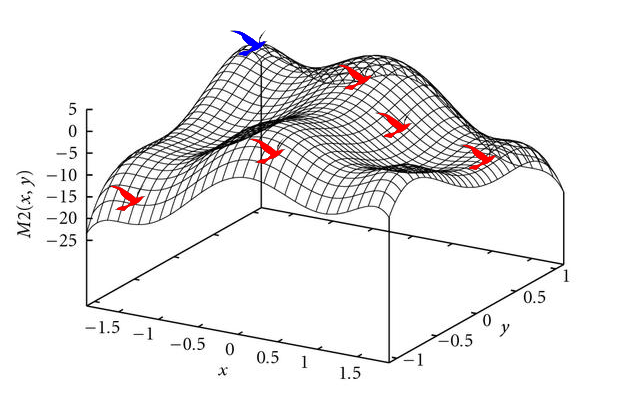

Figura 1: analogia de um bando de pássaros em um espaço de busca de 3D. Considerando um problema de maximização, o pássaro azul é a partícula de solução ótima do problema.

##O algoritmo do PSO
O algoritmo do PSO é simples e são necessários poucos parâmetros para ajustes. O primeiro dele é o tamanho da população. Normalmente é utilizado uma população 10x a dimensão do problema, por exemplo, se estivermos otimizando a curva da Figura 1, uma boa escolha da população será 30, pois a função a ser otimizada possui 3 dimensões, 
(x,y,z).

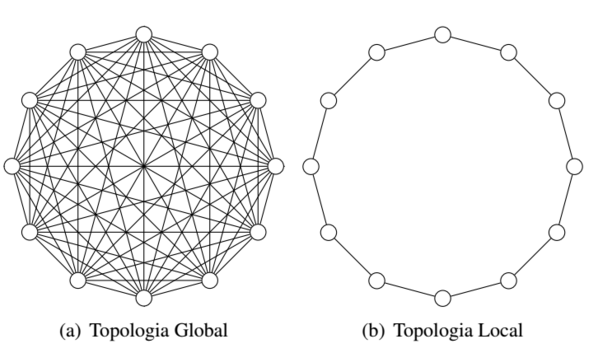
Figura 2: Topologias do PSO

#Equações que compõem o PSO

Posição da Partícula:


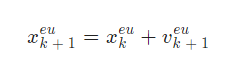

Velocidade da Particula:


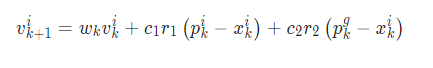

Onde:


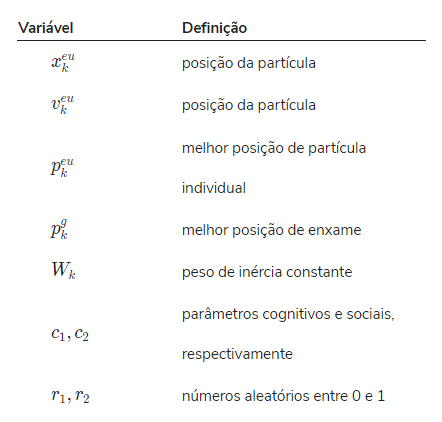

##Equacionamento
Bom, sabemos que o PSO busca a solução ótima alterando as trajetórias dos indivíduos de sua população. Para fazer isso o algoritmo atualiza a velocidade e a posição de cada partícula. Considere uma população com 
K
 partículas. As variáveis 
(v
k)
 e 
(x
k)
 serão a velocidade e posição da particula 
(ki)
, respectivamente. A velocidade e posição de cada partícula, deve ser atualizada de acordo com as equações 1 e 2, respectivamente.

vK+1 = wvk +c1r1 (pbestk - xk) + c2r2(gbest - xk)

xk + 1 = xk + vk


As variáveis 
v
k
+
1
 e 
x
k
+
1
 serão, respectivamente, a velocidade e a posição atualizada da partícula de acordo com:

*   w: coeficiente de inércia
*   pbestk: melhor posição conhecida da partícula K
*  gbest: melhor posição conhecida dentre todas as partículas
*   c1 e c2: constantes de aceleração referentes ao melhor individual e global, respectivamente.
* r1 e r2: números aleatórios extraídos do intervalo [0,1]








In [ ]:
# implementação python de otimização de enxame de partículas (PSO)
# minimizando a função de rastrigina e esfera

import random
import math    # cos() para Rastrigin
import copy    # conveniência de cópia de matriz
import sys     # flutuação máxima
 
 
#-------funções de fitness---------
 
# função rastrigin 
def fitness_rastrigin(position):
  fitnessVal = 0.0
  for i in range(len(position)):
    xi = position[i]
    fitnessVal += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
  return fitnessVal
 
#função esfera
def fitness_sphere(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi*xi);
    return fitnessVal;
#-------------------------
 
#classe de partículas
class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # inicialize a posição da partícula com valor 0,0
    self.position = [0.0 for i in range(dim)]
 
     # inicialize a velocidade da partícula com valor 0,0
    self.velocity = [0.0 for i in range(dim)]
 
    # inicialize a melhor posição de partícula da partícula com valor 0,0
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times para calcular a posição e a velocidade aleatórias
    # faixa de posição e velocidade é [minx, max]
    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)
 
    # calcular a aptidão da partícula
    self.fitness = fitness(self.position) # atual fitness
 
    # inicialize a melhor posição e adequação desta partícula
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness
 
# função de otimização de enxame de partículas
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hiperparâmetros
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)
 
  rnd = random.Random(0)
 
  # criar n partículas aleatórias 
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # calcule o valor de best_position e best_fitness no enxame
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # melhor enxame
 
  # calcular melhor partícula de enxame e sua aptidão
  for i in range(n): # verifique cada partícula
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # loop principal do pso
  Iter = 0
  while Iter < max_iter:
     
    # a cada 10 iterações
    # imprime o número da iteração e o melhor valor de fitness até agora

    if Iter % 10 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " melhor fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # processar cada partícula
       
      # calcular a nova velocidade da partícula atual
      for k in range(dim):
        r1 = rnd.random()    # randomizações
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               ) 
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # calcular a nova posição usando a nova velocidade
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # calcular a adequação da nova posição
      swarm[i].fitness = fitness(swarm[i].position)
 
      # a nova posição é um novo melhor para a partícula?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# fin do PSO
 
 
#----------------------------
# Código do driver para a função rastrigin
 
print("\nComece a otimização do enxame de partículas na função rastrigin\n")
dim = 3
fitness = fitness_rastrigin
 
 
print("O objetivo é minimizar a função de Rastrigin em " + str(dim) + " variáveis")
print("A função encontrou o min = 0.0 no (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nIniciando o algoritmo PSO\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO concluído\n")
print("\nMelhor solução encontrada:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("adequação da melhor solução = %.6f" % fitnessVal)
 
print("\nEnxame de partículas final para função rastrigin\n")
 
 
print()
print()
 
 
# Código do driver para a função Esfera(f1)

print("\nComece a otimização de enxame de partículas na função de esfera\n")
dim = 3
fitness = fitness_sphere
 
 
print("O objetivo é minimizar a função de esfera em " + str(dim) + " variáveis")
print("A função encontrou o min = 0.0 no (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO concluído\n")
print("\nMelhor solução encontrada:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnxame de partículas final para função de esfera\n")


Comece a otimização do enxame de partículas na função rastrigin

O objetivo é minimizar a função de Rastrigin em 3 variáveis
A função encontrou o min = 0.0 no (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Iniciando o algoritmo PSO

Iter = 10 melhor fitness = 8.463
Iter = 20 melhor fitness = 4.792
Iter = 30 melhor fitness = 2.223
Iter = 40 melhor fitness = 0.251
Iter = 50 melhor fitness = 0.251
Iter = 60 melhor fitness = 0.061
Iter = 70 melhor fitness = 0.007
Iter = 80 melhor fitness = 0.005
Iter = 90 melhor fitness = 0.000

PSO concluído


Melhor solução encontrada:
['0.000618', '0.000013', '0.000616']
adequação da melhor solução = 0.000151

Enxame de partículas final para função rastrigin




Comece a otimização de enxame de partículas na função de esfera

O objetivo é minimizar a função de esfera em 3 variáveis
A função encontrou o min = 0.0 no (0, 0, 0)
Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 melhor fitness = 0.189
I

# Gráfico da Função 7

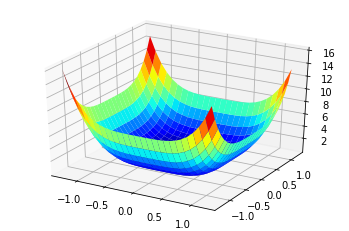

In [ ]:
import numpy as np # não consegui rodar no código do pso
import matplotlib.pyplot as plt
from numpy import random

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-1.28, 1.28,0.1)
y = np.arange(-1.28, 1.28, 0.1)
x, y = np.meshgrid(x, y)
z = random.randint(0,1)
sum =0
for i in range(3):
    sum = sum + (i * (x**4 + y **4))
result = sum + z
surface = ax.plot_surface(x, y, result, cmap='jet')
#plt.show()
#plt.contour(x,y,result)
#plt.show()
#plt.scatter(x, y, result)
#plt.show()

## Gráfico da Função 5

solution 2


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

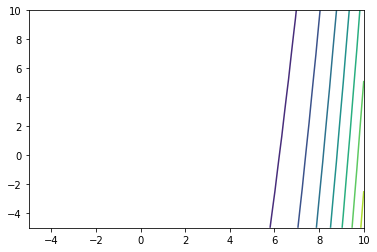

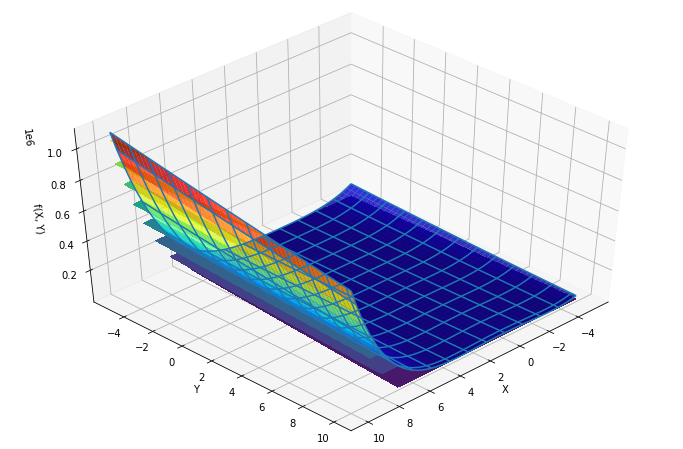

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
def f(x1, x2): return 100*(x2-x1**2)**2+(x1-1)**2
x1 = np.linspace(-5, 10)
x2 = np.linspace(-5, 10)
X1, X2 = np.meshgrid(x1, x2)
F = f(x1, x2)
plt.contour(X1, X2, f(X1, X2))

def plotter(E, A):
  fig = plt.figure(figsize = [12, 8])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X1, X2, f(X1, X2), cmap='jet', alpha=0.8)
  ax.plot_wireframe(X1, X2, f(X1, X2), rcount=15, ccount=15)
  ax.view_init(elev=E, azim=A)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('f(X, Y)')
  ax.contourf(x1, x2, f(X1, X2))
  print("solution 2")
plotter(45, 45)
from ipywidgets import interactive
iplot = interactive(plotter, E = (-90, 90, 5),
                             A = (-90, 90, 5))
iplot

## Funções(5 e 7) aplicadas ao algoritmo do PSO

In [ ]:
from __future__ import division
import random
import math


#--- esfera (função 1)------------------------------------------------------------+

def esfera(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total
#minimo(0,0)
#--- Rosenbrock (função 5)------------------------------------------------------------+

def rosenbrock(x):
    total=0
    for i in range(len(x)-1):
      total += 100*((x[i]**2 - x[i - 1])**2) + (1-x[i])**2
      return total
#minimo(0,0)
#--- Noisy Quartic (função 7)------------------------------------------------------------+

#def quartic(x,y):
  # sum = 0
   #for i in range(3):
    # sum = sum + (i * (x**2 + y **2))
    # return sum

      

#--- Principal---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]         # posição da partícula   
        self.velocity_i=[]         # velocidade da partícula              
        self.pos_best_i=[]         # melhor posição individual
        self.err_best_i=-1         # melhor erro individual
        self.err_i=-1              # erro individual


        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # avaliar a aptidão atual
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # verifique se a posição atual é a melhor individual
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # atualizar a nova velocidade das partículas
    def update_velocity(self,pos_best_g):
        w=0.5       # peso de inércia constante (quanto pesar a velocidade anterior)
        c1=1        # constante cognitiva
        c2=2        # constante social 

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # atualizar a posição da partícula com base em novas atualizações de velocidade
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # ajuste a posição máxima se necessário
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # ajuste a posição mínima se necessário
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # melhor erro para o grupo
        pos_best_g=[]                   # melhor posição para o grupo

        # estabelecer o enxame
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # iniciar o ciclo de otimização
        i=0
        while i < maxiter:
            # imprimir i,err_best_g
            # ciclo através de partículas em enxame e avaliar a aptidão
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determinar se a partícula atual é a melhor (globalmente)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # percorrer enxame e atualizar velocidades e posição
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # printar resultado final 
        print('FINAL:') 
        print(pos_best_g) 
        print(err_best_g)
        
     

if __name__ == "__PSO__":
    main()

#
#--- RUN ----------------------------------------------------------------------+

initial=[5,5]               # local de partida inicial[x1,x2...]
bounds=[(-10,10),(-10,10)]  # limites de entrada[(x1_min,x1_max),(x2_min,x2_max)...]
PSO(esfera, initial,bounds,num_particles=15,maxiter=30)
PSO(rosenbrock, initial,bounds,num_particles=15,maxiter=30)
#PSO(quartic, initial,bounds,num_particles=15,maxiter=30)

FINAL:
[-0.0010981617420389844, 0.0005884672984611888]
1.5522529730363067e-06
FINAL:
[2.2111975916212994, 4.889574107459039]
1.467002821453331


## caxeiro viajante(resolvido)


In [ ]:
#[1] Importando pacotes e módulos

# instalando pacote
!pip install pyswarms

# importando módulos
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# importando PySwarms
import pyswarms as ps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 5.1 MB/s 


In [ ]:
#[2] Geração do Grafo e Função de Custo

# função graphTSP(numCities, minDist, maxDist)
# parâmetros: 
#   numCities: número de cities
#   minDist: menor valor de distância
#   maxDist: maior valor de distância
# retorno:
#   roads: lista de estradas - arestas: (cidade1, cidade2, distância). As distâncias 
#   entre duas cidades são determinadas aleatoriamente entre minDist e maxDist

#-----------------GERANDO AS DISTÂNCIAS ENTRE AS CIDADES------------
def graphTSP(numCities, minDist, maxDist):
  roads = []# arestas
  for i in range(numCities):
    for j in range(i+1, numCities):
      roads.append((i, j, random.randint(minDist, maxDist)))
  return roads

numCities = 5     # Número de cidade inicial

#-----------------GERANDO AS DISTÂNCIAS ENTRE AS CIDADES------------

#-------------------------------------------------------------------
while(True):
  numCities = int(input('Digite o número de cidades [>4]: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

roads = graphTSP(numCities, 10, 100)
#-------------------------------------------------------------------

# Função evalRoutes(particles)
# parâmetros:
#   particles: array (numpy.ndarray) de posições das partículas (rotas)
#np.ndarray(shape=(2,2), dtype=float, order='F')
# retorno:
#   costs: lista de custos para cada partícula.

def evalRoutes(particles): # avaliar os custos
  costs = []
  for individual in particles:
    cost = 0;

    validArcs = np.where(individual == 1)[0]

    for arc in validArcs:
      cost = cost + roads[arc][2]

    for i in range(numCities):
      count = 0
      for arc in validArcs:
        if (roads[arc][0]==i or roads[arc][1]==i):
          count = count + 1
      if(count!=2):
        cost = cost + 10000

    if(sum(individual)!=numCities):
      cost = cost + 10000
    else:
      # identificar a ocorrência de ciclos
      validArcs = list(validArcs)
      current = validArcs[0]
      visited = [roads[current][0]]
      while(len(validArcs)>1):
        node = roads[current][1]
        if (not roads[current][0] in visited):
          node = roads[current][0]
        elif (roads[current][1] in visited):
          cost = cost + 10000
          break
        visited.append(node)
        validArcs.remove(current)
        for arc in validArcs:
          if (node == roads[arc][0] or node == roads[arc][1]):
            current = arc
            break

    costs.append(cost)

  return costs

print('Grafo:')
for road in roads:
  print(road)

Digite o número de cidades [>4]: 4
O número de cidades deve ser maior que 4!
Digite o número de cidades [>4]: 5
Grafo:
(0, 1, 27)
(0, 2, 99)
(0, 3, 54)
(0, 4, 34)
(1, 2, 30)
(1, 3, 49)
(1, 4, 65)
(2, 3, 32)
(2, 4, 90)
(3, 4, 49)


In [ ]:
#[3] Hiperparâmetros e Otimização

#------------------- definir números de partículas --------------------------
numParticles = 10

while(True):
  numParticles = int(input('Digite o número de partículas [>=10]: '))
  if (numParticles >= 10):
    break
  else:
    print('O número de partículas deve ser maior ou igual a 10!')
#------------------- definir números de partículas --------------------------

##------------------- informe o número de interações --------------------------
numIters = 10

while(True):
  numIters = int(input('Digite o número de iterações do algoritmo [>=10]: '))
  if (numIters >= 10):
    break
  else:
    print('Use no mínimo 10 iterações!')
##------------------- informe o número de interações --------------------------

# hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':1, 'k':(numParticles-1), 'p':1}# k =tamanho da vizinhaça, irá influenciar na velocidade da partícula, a vizinhança
#p é o valor de influência da vizinhança 


# instanciação de objeto da classe BinaryPSO
optimizer = ps.discrete.binary.BinaryPSO(n_particles=numParticles, dimensions=len(roads), options=options, velocity_clamp=(-3,3))

# execução da otimização
cost, pos = optimizer.optimize(evalRoutes, iters=numIters)

print('Custo = ', cost)

validArcs = np.where(pos==1)[0]
print('Arcos: ')
for arc in validArcs:
  print(roads[arc])

Digite o número de partículas [>=10]: 5
O número de partículas deve ser maior ou igual a 10!
Digite o número de partículas [>=10]: 10
Digite o número de iterações do algoritmo [>=10]: 12


2022-11-18 03:04:41,857 - pyswarms.discrete.binary - INFO - Optimize for 12 iters with {'c1': 0.5, 'c2': 0.3, 'w': 1, 'k': 9, 'p': 1}
pyswarms.discrete.binary: 100%|██████████|12/12, best_cost=172
2022-11-18 03:04:41,918 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 172.0, best pos: [1 0 0 1 1 0 0 1 0 1]


Custo =  172.0
Arcos: 
(0, 1, 27)
(0, 4, 34)
(1, 2, 30)
(2, 3, 32)
(3, 4, 49)
